## You have statistics of names for children born in the US between 2004 and 2014

Statistics (Count) are provided for each name, state, gender and year of birth if Count >= 5.

File is available here:
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv

In [1]:
import pandas as pd
baby_names = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv', sep=',')

In [ ]:
# import other useful libraries
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
from IPython.display import display

%matplotlib inline

### EDA
- First, run EDA to find if there's any anomely (e.g. missing values, outliers) in the data.

In [ ]:
# Define some utility functions for EDA 
def fraction_rows_missing(df, verbose=False, n=None):
    '''
    Return percent of rows with any missing
    data in the dataframe. 
    
    Input:
        df (dataframe): a pandas dataframe with potentially missing data
    Output:
        frac_missing (float): fraction of rows with missing data
    '''
    rows_null = df.isnull().any(axis=1)
    n_null = sum(rows_null)
    
    if verbose: # show rows with null values
        if n_null > 0: 
            print(f"(fraction_rows_missing) Rows with nulls (n={n_null}):\n{df[rows_null].head(n=n).to_string(index=False)}\n")
    
    return sum(rows_null)/df.shape[0]

In [ ]:
fraction_rows_missing(baby_names, verbose=1)

# ... No missing values found

0.0

In [ ]:
baby_names.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [ ]:
# Drop the redundant index column?
baby_names = baby_names.loc[:, ~baby_names.columns.str.match("Unnamed")]
baby_names.head()

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


In [ ]:
print(f"> Shape(baby_names): {baby_names.shape}")

states = baby_names['State'].unique()
print(f"> Number of states: {len(states)}") # all states + DC
years = baby_names['Year'].unique()
print(f"> Years: {years}")

# Do all states have the data for all given years? 
for state, dfi in baby_names.groupby('State'): 
    assert set(dfi['Year'].unique()) == set(years)
# ... Yes!

# How many genders? 
genders = baby_names['Gender'].unique()
print(f"> Genders (n={len(genders)}): {genders}")

# How many unique names? 
names = baby_names['Name'].unique()
print(f"> Names (n={len(names)}):\n  E.g. {np.random.choice(names, 10)}\n")

# Count summary stats
numeric_vars = ['Count', ]
print(f"> Summary statistics for numerical variable(s)")
for i, var in enumerate(numeric_vars): 
    print(f"[{i+1}] variable '{var}'\n")
    print(baby_names['Count'].describe().apply(lambda x: format(x, 'f')))

> Shape(baby_names): (1016395, 6)
> Number of states: 51
> Years: [2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014]
> Genders (n=2): ['F' 'M']
> Names (n=17632):
  E.g. ['Adain' 'Jaelynn' 'Theophilus' 'Zavior' 'Vanna' 'Liliya' 'Nico' 'Shanell'
 'Tniya' 'Nyanza']

> Summary statistics for numerical variable(s)
[1] variable 'Count'

count    1016395.000000
mean          34.850124
std           97.397346
min            5.000000
25%            7.000000
50%           11.000000
75%           26.000000
max         4167.000000
Name: Count, dtype: object


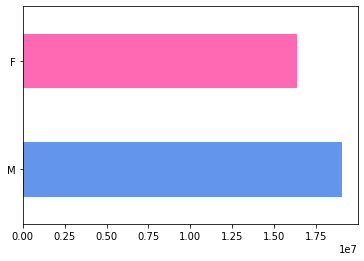

In [ ]:
# Visualize some of the categorical variables
viz_vars = ['Gender', ]

genders = baby_names['Gender'].unique()
adict = {gender:0 for gender in genders}
for gender in genders: 
    adict[gender] = baby_names[baby_names['Gender']==gender]['Count'].sum()
s = pd.Series(adict)
ax = s.sort_values(ascending=False).plot(kind='barh', color=['cornflowerblue', 'hotpink',]) #  'lightskyblue'

## How many different names in the database? 

Ans: 17632

In [ ]:
unique_names = baby_names['Name'].unique()
n_unqiue = len(unique_names)
print(f"> Number of unique/different names: {n_unqiue}")

> Number of unique/different names: 17632


## How many boys and how many girls were born overall? 

__Ans:__ 
- boys  (M)   19041199 (19M+)
- girls (F)   16380293 (16M+)


In [ ]:
df_boys = baby_names[baby_names['Gender']=='M']
df_girls = baby_names[baby_names['Gender']=='F']

# Sum all counts across all names, all years and all states
n_boys_total = df_boys['Count'].sum()
n_girls_total = df_girls['Count'].sum()
print(f"> Number of boys: {n_boys_total}; number of girls: {n_girls_total}")

# Each row can also be uniquely identified by the 4-tuple ('Name', 'Year', 'Gender', 'State')
# dfg = baby_names.groupby(['Name', 'Year', 'Gender', 'State'])
# assert dfg.ngroups == baby_names.shape[0]

> Number of boys: 19041199; number of girls: 16380293


## What are the 10 most popular names in California in 2010?

The answer depends on the __the definition of "top N"__ 

__Ans:__ 

We can simply select the 'top 10' most popular names by sorting the names according to their respective counts and simply slice off the first subset of size 10. One caveat is that many names can be both male and female; therefore, we need to consolidate the counts first before sorting the names by their respective counts (See the next cell for more details).

Given the reasoning above, we can conclude the top 10 most popular names in CA in 2010 (by total counts) are: 

`['Isabella' 'Sophia' 'Jacob' 'Daniel' 'Anthony' 'Angel' 'Alexander'
 'Jayden' 'Ethan' 'David']`

In [ ]:
topn = 10
condition = (baby_names['State']=='CA') & (baby_names['Year']==2010) # those in CA and in year 2010
baby_ca_2010 = baby_names[condition]
n_rows = len(baby_ca_2010)
print(f"> Number of rows: {n_rows}\n") 

# Additional EDA
###############################################################################
def count_entries(df, col='Name', col_count='Count'):  
    df = df[col].value_counts(ascending=False).to_frame('Count')
    return df.rename_axis(col).reset_index()

### Some names could be both male and female
n_uniq_names = len(baby_ca_2010['Name'].unique())
print(f"> Number of unique names: {n_uniq_names} <? number of rows: {n_rows}\n")
# ... number of unique names (6723) < n_rows (7004), suggesting duplicates

name_count = count_entries(baby_ca_2010) 
print(f"> Names used by both male and female:")
display(name_count.head(10))

# Check (a subset of) names with duplicate entries
n_test = 5
print(f"\n> Check a random subset (n={n_test}) of the names used by both male and female ...")
test_set = name_count.loc[name_count.Count == 2].sample(n=n_test)['Name']
df_test = []
for name in test_set: 
    df_test.append(baby_ca_2010[baby_ca_2010['Name']==name])
display(pd.concat(df_test, ignore_index=True))
print()

###############################################################################
# Observation
# -----------
# 1. As we can see from the output, all the duplicate entries are due to the same
#    name being used for both male and female. 
# 
###############################################################################

# Consolidate the count (some names can be be used by both male and female)
name_count_combined = baby_ca_2010.groupby('Name')['Count'].sum()

# Sort names according to their frequencies (popularity)
name_count_combined.sort_values(ascending=False, inplace=True) 

# Top 10 most popular names (by count)
topn_names = name_count_combined[:topn]
print(f"> The {topn} most popular names in CA in 2010:\n{topn_names.index.values}\n")
print()

# Verify the result by showing their counts
topn_names.reset_index()

> Number of rows: 7004

> Number of unique names: 6723 <? number of rows: 7004

> Names used by both male and female:


,Name,Count
0,Christian,2
1,Jordyn,2
2,Robin,2
3,Emerson,2
4,Charley,2
5,Shia,2
6,Cayden,2
7,Yael,2
8,Jackie,2
9,Grayson,2



> Check a random subset (n=5) of the names used by both male and female ...


,Id,Name,Year,Gender,State,Count
0,548118,Levi,2010,F,CA,8
1,695825,Levi,2010,M,CA,536
2,549222,Lian,2010,F,CA,5
3,697396,Lian,2010,M,CA,10
4,547586,Ryley,2010,F,CA,11
5,697695,Ryley,2010,M,CA,8
6,546600,Izel,2010,F,CA,25
7,698077,Izel,2010,M,CA,6
8,546397,Noor,2010,F,CA,33
9,698161,Noor,2010,M,CA,6



> The 10 most popular names in CA in 2010:
['Isabella' 'Sophia' 'Jacob' 'Daniel' 'Anthony' 'Angel' 'Alexander'
 'Jayden' 'Ethan' 'David']




,Name,Count
0,Isabella,3364
1,Sophia,3357
2,Jacob,3347
3,Daniel,3131
4,Anthony,2858
5,Angel,2642
6,Alexander,2601
7,Jayden,2591
8,Ethan,2460
9,David,2420


In [ ]:
# Organize the logic into a reusuable function for similar queries. 
def sort_items_by_count(df, condition=None, topn=None, 
                        ascending=False,
                        col='Name', col_freq='Count'): 
    # define the target (sub-)population
    df_subset = df[condition] if condition is not None else df 

    df_count = df_subset.groupby(col)[col_freq].sum() # consolidate counts
    df_count.sort_values(ascending=ascending, inplace=True) # sort by counts/popularity
    
    if topn is None: 
        return df_count.reset_index()
    return df_count[:topn].reset_index()

# Verify the result given earlier
sort_items_by_count(baby_names, 
           condition=(baby_names['State']=='CA') & (baby_names['Year']==2010), 
           topn=10)

,Name,Count
0,Isabella,3364
1,Sophia,3357
2,Jacob,3347
3,Daniel,3131
4,Anthony,2858
5,Angel,2642
6,Alexander,2601
7,Jayden,2591
8,Ethan,2460
9,David,2420


## What are the 10 most popular names for children born after 2010 in US?



In [ ]:
col_name = 'Name'
name_count = sort_items_by_count(baby_names, 
                          condition=(baby_names['Year'] > 2010), 
                          topn=10, col=col_name)
candidates = name_count[col_name].values
print(f"> Most popular names (birth year > 2010):\n{candidates}\n")

print(f"> Verify the result by including the assoicated count ...")
name_count

> Most popular names (birth year > 2010):
['Sophia' 'Emma' 'Jacob' 'Isabella' 'Mason' 'Olivia' 'Noah' 'William'
 'Liam' 'Ethan']

> Verify the result by including the assoicated count ...


,Name,Count
0,Sophia,83725
1,Emma,81359
2,Jacob,74152
3,Isabella,73464
4,Mason,73297
5,Olivia,72611
6,Noah,71603
7,William,67415
8,Liam,66636
9,Ethan,66122


## How many girls and how many boys were born in each state in each year?

Follow-up:

Pay attention to 4 states: AK, WY, CA and TX.
It appears that the fraction of girls is higher in CA & TX; from what you know about the dataset, why might that be the case?

__Ans:__ 

- `df_state_year` is a dataframe with the number of girls and boys stratified by state and year (via groupby)
  - The number of girls is represented by `F_Count` while the number of boys is represented by `M_Count`
  - Additional columns `Ratio` (female ratio) and `Total` (total number of newborns per state and year) are added to `df_state_year` for ease of further analysis.
<br>

Why do CA & TX have higher female ratios than AK & WY?
- AK is the first state in the dataset while WY is the last state. Judging from the index not starting from 0, it's possible that the data subset associated with AK and WY is not complete; the second follow-up cell attempts to find futher clues by sorting states with female ratio (Ratio). 
  - Indeed, AK and WY are among the states with relatively lower female ratio; however, this is also true for other states (e.g. HI, VT) with relatively small population. 
- States with relatively small population tend to have a higher disparity between the sample size of female and male newborns. 
  - This can be verified by computing Pearson correlation coefficient between female ratio (averaged over all years) and the total sample size of newborns.
  - See `df_mean_ratio` for more details (2nd cell)
  - Indeed, we find that the (mean) female ratio is significantly correlated with the sample size of the state (summed over all years). 
- __As the sample size grows larger, the female ratio approaches closer to 0.5 as would be expected__. 

In [ ]:
def get_count(df, cond=None): 
    if cond is None: 
        return df['Count'].sum()
    return df[cond]['Count'].sum()

### Create a new dataframe with the number of boys and girls 
# for each combination of state and year
header = ['State', 'Year', 'F_Count', 'M_Count', ]
adict = {h:[] for h in header}
for pair, dfi in baby_names.groupby(['State', 'Year']): # foreach partition of state and year
    state, year = pair
    adict['State'].append(state)
    adict['Year'].append(year)

    # Count total number of boys and girls in this stratum of data
    n_girls = dfi[dfi['Gender']=='F']['Count'].sum()
    n_boys = dfi[dfi['Gender']=='M']['Count'].sum()
    adict['F_Count'].append( n_girls )
    adict['M_Count'].append( n_boys )
    # adict['Ratio'].append( n_girls/(n_boys+0.0) ) # girl-to-boy ratio

# `df_state_year` contains the number of girls and boys born in each state and in each year
df_state_year = df = pd.DataFrame(adict)
assert df['F_Count'].sum() == n_girls_total
assert df['M_Count'].sum() == n_boys_total

### Why the fraction of girls is higher in CA & TX? 
# First of all, CA and TX both have relatively higher population compared to AK, WY
# Same patterns found in NY population, where the fraction of girls is higher

# Compute female ratio
df_state_year['Ratio'] = df_state_year['F_Count']/(df_state_year['F_Count']+df_state_year['M_Count'])
# df_state_year.apply(lambda row: row['F_Count']/(row['M_Count']+0.0), axis=1)

# Compute sum of the number of girls and boys
df_state_year['Total'] = df_state_year['F_Count']+df_state_year['M_Count']
# df_state_year.apply(lambda row: row['F_Count']+row['M_Count'], axis=1)

# Other statistics 
df_state_year['F_M_Delta'] = df_state_year['F_Count']-df_state_year['M_Count']

print()
states = ['AK', 'WY', 'CA', 'TX', 'NY' ]
for state in states: 
    dfs = df_state_year[df_state_year['State'] == state] 
    print(f"> State: {state}, n(years): {dfs.shape[0]}")
    display(dfs); print()


> State: AK, n(years): 11


,State,Year,F_Count,M_Count,Ratio,Total,F_M_Delta
0,AK,2004,2317,3271,0.414639,5588,-954
1,AK,2005,2295,3319,0.408799,5614,-1024
2,AK,2006,2382,3337,0.416506,5719,-955
3,AK,2007,2333,3446,0.403703,5779,-1113
4,AK,2008,2425,3506,0.408869,5931,-1081
5,AK,2009,2333,3463,0.402519,5796,-1130
6,AK,2010,2407,3425,0.412723,5832,-1018
7,AK,2011,2515,3397,0.425406,5912,-882
8,AK,2012,2290,3341,0.406677,5631,-1051
9,AK,2013,2426,3466,0.411745,5892,-1040



> State: WY, n(years): 11


,State,Year,F_Count,M_Count,Ratio,Total,F_M_Delta
550,WY,2004,1267,1815,0.411097,3082,-548
551,WY,2005,1318,2060,0.390172,3378,-742
552,WY,2006,1327,2185,0.377847,3512,-858
553,WY,2007,1492,2118,0.413296,3610,-626
554,WY,2008,1414,2120,0.400113,3534,-706
555,WY,2009,1298,2059,0.386655,3357,-761
556,WY,2010,1265,1897,0.400063,3162,-632
557,WY,2011,1142,1847,0.382068,2989,-705
558,WY,2012,1145,1906,0.375287,3051,-761
559,WY,2013,1233,1960,0.386157,3193,-727



> State: CA, n(years): 11


,State,Year,F_Count,M_Count,Ratio,Total,F_M_Delta
44,CA,2004,228629,251964,0.475723,480593,-23335
45,CA,2005,230207,253941,0.475489,484148,-23734
46,CA,2006,234532,260073,0.474180,494605,-25541
47,CA,2007,235978,261217,0.474619,497195,-25239
48,CA,2008,229053,253810,0.474364,482863,-24757
49,CA,2009,217958,241789,0.474082,459747,-23831
50,CA,2010,210587,233343,0.474370,443930,-22756
51,CA,2011,207102,229755,0.474073,436857,-22653
52,CA,2012,208355,229714,0.475621,438069,-21359
53,CA,2013,204089,225999,0.474528,430088,-21910



> State: TX, n(years): 11


,State,Year,F_Count,M_Count,Ratio,Total,F_M_Delta
473,TX,2004,159167,179012,0.470659,338179,-19845
474,TX,2005,160442,180922,0.470003,341364,-20480
475,TX,2006,165969,186152,0.471341,352121,-20183
476,TX,2007,168940,190108,0.470522,359048,-21168
477,TX,2008,167455,188896,0.469916,356351,-21441
478,TX,2009,166358,186112,0.471978,352470,-19754
479,TX,2010,159273,178271,0.471858,337544,-18998
480,TX,2011,155424,174574,0.470985,329998,-19150
481,TX,2012,157713,176992,0.471200,334705,-19279
482,TX,2013,160159,179358,0.471726,339517,-19199



> State: NY, n(years): 11


,State,Year,F_Count,M_Count,Ratio,Total,F_M_Delta
374,NY,2004,96917,109628,0.469229,206545,-12711
375,NY,2005,94969,108167,0.467514,203136,-13198
376,NY,2006,96417,109389,0.468485,205806,-12972
377,NY,2007,97618,110615,0.468792,208233,-12997
378,NY,2008,95389,108967,0.466779,204356,-13578
379,NY,2009,94616,107519,0.468083,202135,-12903
380,NY,2010,92858,106024,0.466900,198882,-13166
381,NY,2011,92536,104156,0.470461,196692,-11620
382,NY,2012,92026,104011,0.469432,196037,-11985
383,NY,2013,90901,102056,0.471095,192957,-11155


In [ ]:
# AK is the first state in the dataset while WY is the last state
# Judging from the index not starting from 0, it's possible that the data subset 
# associated with AK and WY is not complete

# Could this be the case? We could rank the female ratio to get a better picture
adict = {'State': [], 'Ratio': [], 'Total': [], 'F_Count': [], 'M_Count': [], 'RStd': []}
for state, dfi in df_state_year.groupby('State'): 
    adict['State'].append(state)
    adict['Ratio'].append(dfi['Ratio'].mean()) # average female ratio 
    adict['Total'].append(dfi['Total'].sum()) # sum sample size over all years

    # additional stats 
    adict['F_Count'].append(dfi['F_Count'].sum())
    adict['M_Count'].append(dfi['M_Count'].sum())
    adict['RStd'].append(dfi['Ratio'].std()) # STD of the F/(F+M)-ratio

df_mean_ratio = pd.DataFrame(adict)

# It's also somewhat obvious that female ratios are relatively smaller when the 
# sample sizes are small

### Other statistics
# Find population proprotion for each state
N = n_boys_total + n_girls_total
assert df_mean_ratio['Total'].sum() == N

proportions = []
df_mean_ratio['Proportion'] = df_mean_ratio['Total']/N
# display(df_mean_ratio)

# Sort states by F/(F+M)-ratio
display(df_mean_ratio.sort_values(by='Ratio'))
print()

,State,Ratio,Total,F_Count,M_Count,RStd,Proportion
50,WY,0.391408,36019,14107,21912,0.012944,0.001017
11,HI,0.412271,90406,37279,53127,0.007095,0.002552
0,AK,0.412358,63649,26250,37399,0.007522,0.001797
46,VT,0.413441,36432,15079,21353,0.011575,0.001029
26,MT,0.417433,75765,31622,44143,0.008277,0.002139
39,RI,0.425699,83499,35560,47939,0.006086,0.002357
7,DC,0.427576,82504,35276,47228,0.012003,0.002329
32,NM,0.428401,198657,85115,113542,0.003878,0.005608
8,DE,0.428470,73060,31312,41748,0.007189,0.002063
41,SD,0.428708,79547,34104,45443,0.005291,0.002246


In [ ]:
# name statistics
neutral = [] # gender 'neutral'
male = [] # strictly male
female = [] # strictly female 
n_uniq_names = 0
for name, dfi in baby_names.groupby('Name'):  # name, state, year, gender, count 
    # CA & TX vs AK & WY 
    genders = dfi['Gender'].unique()
    if len(genders) == 2: 
        neutral.append(name)
    else: 
        if genders[0] == 'F': 
            female.append(name)
        else: 
            male.append(name)
    n_uniq_names += 1
print(f"> n(name): {n_uniq_names}")
print(f"... n(neutral): {len(neutral)}")
print(f"... n(male): {len(male)}, n(female): {len(female)}")

# >>> There are more unique girl's names than boy's names

names = {gender: {'state': [], 'name': [], 'count': []} for gender in ['M', 'F', ]}
# Names statistics within each state 
for gender, df_gender in baby_names.groupby('Gender'): # foreach gender (find their ocurrences in each state)
    for pair, df_state_name in df_gender.groupby(['State', 'Name']): 
        state, name = pair 
        names[gender]['state'].append(state)
        names[gender]['name'].append(name)
        names[gender]['count'].append( get_count(df_state_name, cond=None) ) # sum across years

df_male = pd.DataFrame(names['M'])
display(df_male.sort_values('count', ascending=True)[:100])
display(df_male.sort_values('count', ascending=True)[:-100])
df_female = pd.DataFrame(names['F'])
display(df_female.sort_values('count', ascending=True)[:100]) 
display(df_female.sort_values('count', ascending=True)[:-100])    

> n(name): 17632
... n(neutral): 1309
... n(male): 6703, n(female): 9620


,state,name,count
75717,WY,Zayne,5
57140,PA,Asante,5
57142,PA,Ashten,5
37501,MO,Braydin,5
13356,FL,Ahmarion,5
...,...,...,...
13443,FL,Ammon,5
57180,PA,Ayham,5
37411,MO,Atreyu,5
37409,MO,Aspen,5


,state,name,count
75717,WY,Zayne,5
57140,PA,Asante,5
57142,PA,Ashten,5
37501,MO,Braydin,5
13356,FL,Ahmarion,5
...,...,...,...
13875,FL,Christopher,11489
7423,CA,Justin,11534
5438,CA,Bryan,11554
63925,TX,Brandon,11558


,state,name,count
93039,VA,Indiya,5
10573,CA,Kohana,5
63745,NY,Ahna,5
41589,MA,Naila,5
10576,CA,Kona,5
...,...,...,...
83041,TN,Santana,5
68405,NY,Zamora,5
26654,HI,Karen,5
48735,MN,Lynette,5


,state,name,count
93039,VA,Indiya,5
10573,CA,Kohana,5
63745,NY,Ahna,5
41589,MA,Naila,5
10576,CA,Kona,5
...,...,...,...
6535,CA,Alexandra,7727
83663,TX,Alexa,7749
83440,TX,Addison,7780
76336,PA,Isabella,7809


> Correlation between female ratio (Ratio) and population (Total)
          Ratio     Total
Ratio  1.000000  0.614204
Total  0.614204  1.000000


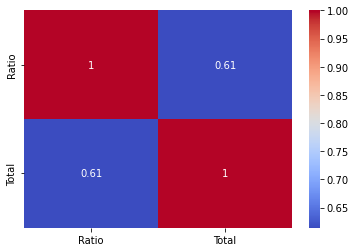


> As the sample size gets larger, the female ratio approaches closer to 0.5



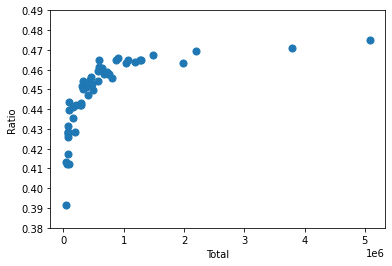

In [ ]:
# from matplotlib.pyplot import figure
# import seaborn as sns
# import numpy as np

# fig, axs = plt.subplots(2,1)
df = df_mean_ratio 

print("> Correlation between female ratio (Ratio) and population (Total)")
corr_matrix = df[['Ratio', 'Total']].corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot = True, fmt='.2g',cmap= 'coolwarm') # ax=axs[0]
plt.show()

print()
print('> As the sample size gets larger, the female ratio approaches closer to 0.5\n')
df.plot.scatter(x="Total", y="Ratio", 
                yticks=np.arange(0.38, 0.50, 0.01), 
                cmap="viridis", s=50) # ax=axs[1]
plt.show()

## Which name was the most popular in each state?

Ans: See the output of the next cell

In [ ]:
columns = ['State', 'Name', 'Count']
adict = {col: [] for col in columns}
for state, dfi in baby_names.groupby('State'):
    adict['State'].append(state) 
    name_count = sort_items_by_count(dfi, condition=None, topn=1, col='Name')
    assert len(name_count) > 0

    adict['Name'].append(name_count.at[0, 'Name'])
    adict['Count'].append(name_count.at[0, 'Count'])

# Organize the findings in a dataframe
df = pd.DataFrame(adict)

# Most popular name in each state (including DC)
df

,State,Name,Count
0,AK,James,563
1,AL,William,5635
2,AR,William,2433
3,AZ,Jacob,5407
4,CA,Daniel,36772
5,CO,Jacob,3540
6,CT,Michael,3013
7,DC,William,1007
8,DE,Michael,798
9,FL,Isabella,16834


## For each of the 10 most popular names, show (in a chart) how many children were born in each year

__Ans:__ See the 2nd cell for the plot. 

1. Find the top 10 most popular names
2. For each name, count the number of newborns across each year (from 2004 to 2014) followed by plotting its associated line chart: Year versus the number of bewborns. 
   - Since we focus on 10 names, we will end up having 10 connected line segments on the chart, each of which illustrates the name-popularity trend across all years from 2004 to 2014. 
   - We can see, for instance, both __Jacob__ and __Emily__ had a decreasing popularity (even though the sum total of Jacob still remained the highest up until 2014). By contrast, __Sophia__ and __Isabella__ had an increasing popularity, peaked, then declinced slightly, but still finished being more popular in 2014 than the beginning of this survey in 2004. 

We could, of course, plot a histogram (year vs number of newborns) for each name but having separate histograms is far from being ideal when it comes to making comparisons because the trending wouldn't be revealed as easily. If, however, we focused on fewer names (say, 2-3), then we could perhaps use an overlaid histogram. 

In [ ]:
# First, find top 10 most popular names overall
global_popular_names = sort_items_by_count(baby_names, condition=None, topn=10, col='Name')
# ... Note that the condition is set to None without any filtering constraints to 
#     take into account the entire dataset

global_popular_names

,Name,Count
0,Jacob,242874
1,Emma,214852
2,Michael,214405
3,Ethan,209277
4,Isabella,204798
5,William,197894
6,Joshua,191551
7,Sophia,191446
8,Daniel,191440
9,Emily,190318


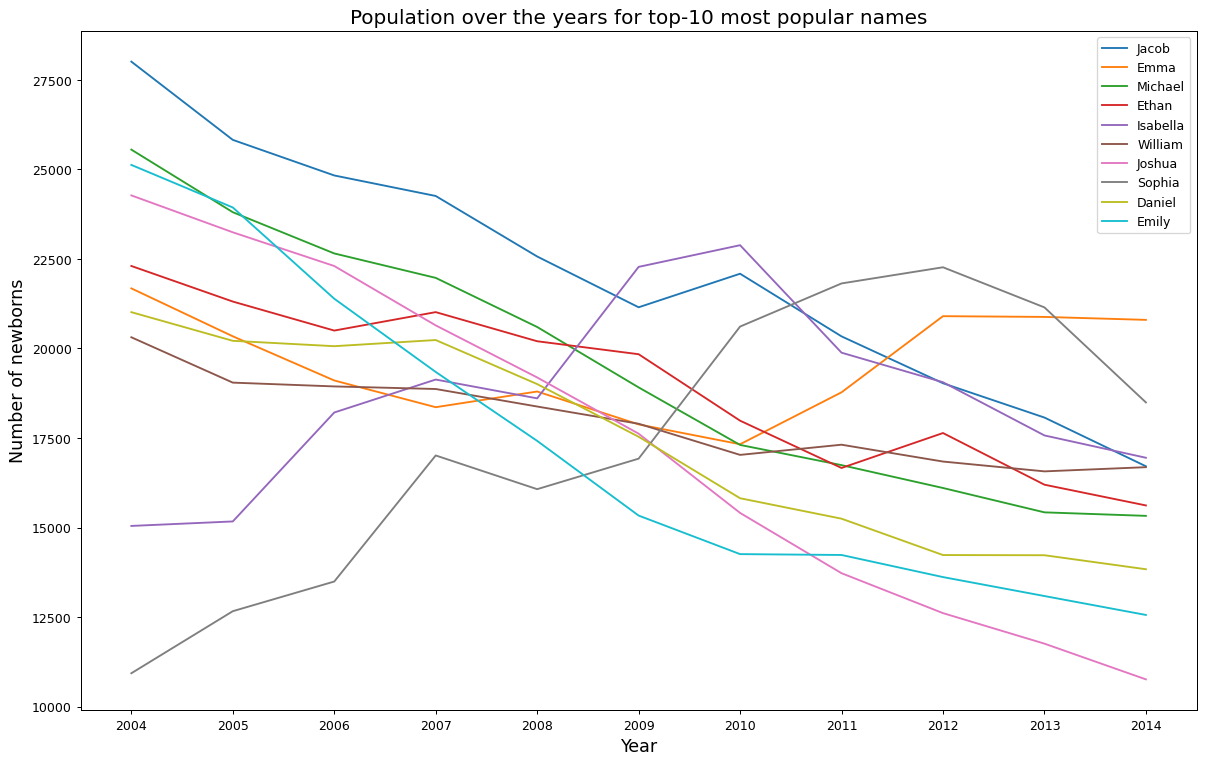

In [ ]:
# from matplotlib.pyplot import figure

figure(figsize=(16, 10), dpi=90)
topn = global_popular_names.shape[0]

# For each name, plot the number of the corresponding children born in each year
dfg = global_popular_names
years = baby_names['Year'].unique()
for name in dfg['Name']: # foreach (global) popular name  
    df_name = baby_names[baby_names['Name'] == name] # all babies of this name
    
    n_babies = []
    for year in years: 
        cond = df_name['Year'] == year # given name, focus on each year
        n_babies.append( get_count(df_name, cond) ) # find n_babies given (name, year) wrt all genders and states
    
    plt.plot(years, n_babies, label=name)

# Add legends, labels and title
plt.legend(loc='best')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of newborns', fontsize=14)
plt.title(f'Population over the years for top-{topn} most popular names', fontsize=16)

plt.xticks(years) # show every year on the x-axis
plt.show()

## Emily was born in 2010. Estimate the probability she was born in WA state?

Ans: ~0.0225

Emily can be both a male and female name (according to `baby_names`) even though Emily is predominently a female name. However, the question explicitly uses the pronoun "she" so we shall focus only on the female. 

As it turns out that male Emily never occurred in the population of 2010, therefore, the random variable *Gender* can be considered independent from *State* given *Year*=2010.

Let S denote *State*, N denote *Name*, Y denote *Year*, and G denote *Gender*

Given above, we will be estimating the following conditional probability: 

&emsp;*P*(S='WA' | N='Emily', Y=2010, G='F')<br> 
&emsp;&emsp;= *P*(S='WA' | N='Emily', Y=2010)<br>
&emsp;&emsp;= *P*(S='WA', N='Emily', Y=2010) / *P*(N='Emily', Y=2010)<br>
&emsp;&emsp;= *C*(S='WA', N='Emily', Y=2010) / *C*(N='Emily', Y=2010)

PS: The first equality is due to S (state) being independent from G (gender) given Y (year).

In [ ]:
# Is it possible that Emily can be male? 
print(baby_names[(baby_names['Name']=='Emily')]['Gender'].value_counts()) # this is just counting entries (not total counts)
# ... Yes! 
print()
# But do we have such observations in year 2010? 
print(baby_names[(baby_names['Name']=='Emily') & (baby_names['Year']==2010)]['Gender'].value_counts())
# ... No!

F    561
M      4
Name: Gender, dtype: int64

F    51
Name: Gender, dtype: int64


In [ ]:
##################################################################
# Estimate P(state=WA | name=Emily & year=2010)
#
#   P(state=WA | name=Emily, year=2010) 
#      = P(state=WA, name=Emily, year=2010) / P(name=Emily, year=2010)
#      = C(state=WA, name=Emily, year=2010) / C(name=Emily, year=2010)
##################################################################

cond_num = (baby_names['State']=='WA') & \
               (baby_names['Name']=='Emily') & \
                  (baby_names['Year']==2010) # & (baby_names['Gender']=='F')
cond_denom = (baby_names['Name']=='Emily') & \
                (baby_names['Year']==2010) # & (baby_names['Gender']=='F')

C = get_count 

# Number of babies born in WA, 2010 and whose name is Emily
c_wa_emily_2010 = C(baby_names, cond=cond_num) 

# Number of babies born in 2010 and whose name is Emily
c_emily_2010 = C(baby_names, cond=cond_denom)

# P(state=WA | name=Emily, year=2020)
p_wa_given_emily_2010 = c_wa_emily_2010 / c_emily_2010

print(f"> C(state=WA, name=Emily, year=2010): {c_wa_emily_2010}")
print(f"> C(name=Emily, year=2010): {c_emily_2010}") # across all states
print()
print(f"> P(state=WA | name=Emily, year=2010): {p_wa_given_emily_2010}")

> C(state=WA, name=Emily, year=2010): 321
> C(name=Emily, year=2010): 14260

> P(state=WA | name=Emily, year=2010): 0.022510518934081347
